# Discovering Closed Frequent patterns in Big Data Using CHARM Algorithm

In this tutorial, we will discuss the first approach to find Closed Frequent patterns in big data using CHARM algorithm.

[__Basic approach:__](#basicApproach) Here, we present the steps to discover Closed Frequent patterns using a single minimum support value

***

## <a id='basicApproach'>Basic approach: Executing CHARM on a single dataset at a particular minimum support value</a>

#### Step 0: install pami repository

In [18]:
!pip install -U pami

#### Step 1: Import the CHARM algorithm

In [19]:
from PAMI.frequentPattern.closed import CHARM  as alg

#### Step 2: Specify the following input parameters

In [20]:
inputFile = 'https://u-aizu.ac.jp/~udayrage/datasets/transactionalDatabases/Transactional_T10I4D100K.csv'

minimumSupportCount=100  #Users can also specify this constraint between 0 to 1.

seperator='\t'       

#### Step 3: Execute the CHARM algorithm

In [21]:
obj = alg.CHARM(iFile=inputFile, minSup=minimumSupportCount, sep=seperator)    #initialize
obj.startMine()            #Start the mining process

Closed Frequent patterns were generated successfully using CHARM algorithm
Closed Frequent patterns were generated successfully using CHARM algorithm


#### Step 4: Storing the generated patterns

##### Step 4.1: Storing the generated patterns in a file

In [22]:
obj.save(outFile='closedPatternsMinSupCount100.txt')

##### Step 4.2. Storing the generated patterns in a data frame

In [23]:
frequentPatternsDF= obj.getPatternsAsDataFrame()

#### Step 5: Getting the statistics

##### Step 5.1: Total number of discovered patterns 

In [24]:
print('Total No of patterns: ' + str(len(frequentPatternsDF)))

Total No of patterns: 17138
Total No of patterns: 17138


##### Step 5.2: Runtime consumed by the mining algorithm

In [25]:
print('Runtime: ' + str(obj.getRuntime()))

Runtime: 29.434940099716187
Runtime: 32.70420789718628


In [26]:
##### Step 5.3: Total Memory consumed by the mining algorithm

In [27]:
print('Memory (RSS): ' + str(obj.getMemoryRSS()))
print('Memory (USS): ' + str(obj.getMemoryUSS()))

Memory (RSS): 51331072
Memory (USS): 32194560
Memory (RSS): 59277312
Memory (USS): 36143104


# Advanced Tutorial on Implementing CHARM Algorithm

In this tutorial, we will discuss the second approach to find Closed Frequent patterns in big data using CHARM algorithm.



[__Advanced approach:__](#advApproach) Here, we generalize the basic approach by presenting the steps to discover Closed Frequent patterns using multiple minimum support values.

***

#### In this tutorial, we explain how the CHARM algorithm  can be implemented by varying the minimum support values

#### Step 1: Import the CHARM algorithm and pandas data frame

In [28]:
from PAMI.frequentPattern.closed import CHARM  as alg
import pandas as pd

#### Step 2: Specify the following input parameters

In [29]:
inputFile = 'https://u-aizu.ac.jp/~udayrage/datasets/transactionalDatabases/Transactional_T10I4D100K.csv'
seperator='\t'
minimumSupportCountList = [100, 150, 200, 250, 300]
#minimumSupport can also specified between 0 to 1. E.g., minSupList = [0.005, 0.006, 0.007, 0.008, 0.009]

result = pd.DataFrame(columns=['algorithm', 'minSup', 'patterns', 'runtime', 'memory'])
#initialize a data frame to store the results of CHARM algorithm

#### Step 3: Execute the CHARM algorithm using a for loop

In [30]:
algorithm = 'CHARM'  #specify the algorithm name
for minSupCount in minimumSupportCountList:
    obj = alg.CHARM('https://u-aizu.ac.jp/~udayrage/datasets/transactionalDatabases/Transactional_T10I4D100K.csv', minSup=minSupCount, sep=seperator)
    obj.startMine()
    #store the results in the data frame
    result.loc[result.shape[0]] = [algorithm, minSupCount, len(obj.getPatterns()), obj.getRuntime(), obj.getMemoryRSS()]


Closed Frequent patterns were generated successfully using CHARM algorithm
Closed Frequent patterns were generated successfully using CHARM algorithm
Closed Frequent patterns were generated successfully using CHARM algorithm
Closed Frequent patterns were generated successfully using CHARM algorithm
Closed Frequent patterns were generated successfully using CHARM algorithm
Closed Frequent patterns were generated successfully using CHARM algorithm
Closed Frequent patterns were generated successfully using CHARM algorithm
Closed Frequent patterns were generated successfully using CHARM algorithm
Closed Frequent patterns were generated successfully using CHARM algorithm
Closed Frequent patterns were generated successfully using CHARM algorithm


In [31]:
print(result)

  algorithm  minSup  patterns    runtime    memory
0     CHARM     100     17138  36.069571  49659904
1     CHARM     150     12347  30.520672  53116928
2     CHARM     200      8714  27.242170  52871168
3     CHARM     250      4955  26.093918  49676288
4     CHARM     300      2856  27.817591  48332800
  algorithm  minSup  patterns    runtime     memory
0     CHARM     100     17138  30.263482  153337856
1     CHARM     150     12347  30.868108   58966016
2     CHARM     200      8714  29.858302   64454656
3     CHARM     250      4955  31.629350   54640640
4     CHARM     300      2856  34.210778   48365568


#### Step 5: Visualizing the results

##### Step 5.1 Importing the plot library

In [32]:
from PAMI.extras.graph import plotLineGraphsFromDataFrame as plt

##### Step 5.2. Plotting the number of patterns

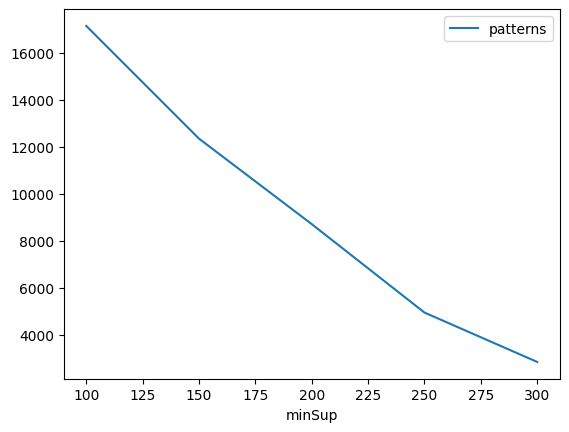

Graph for No Of Patterns is successfully generated!


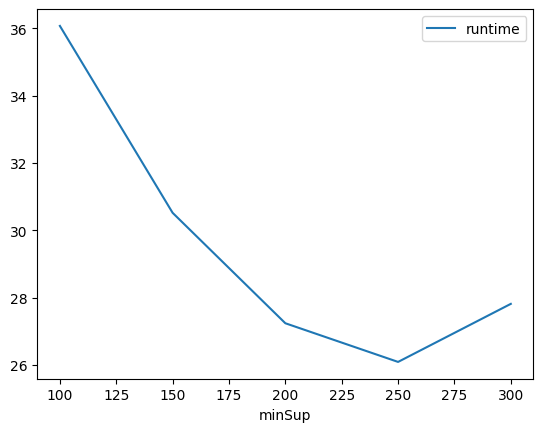

Graph for Runtime taken is successfully generated!


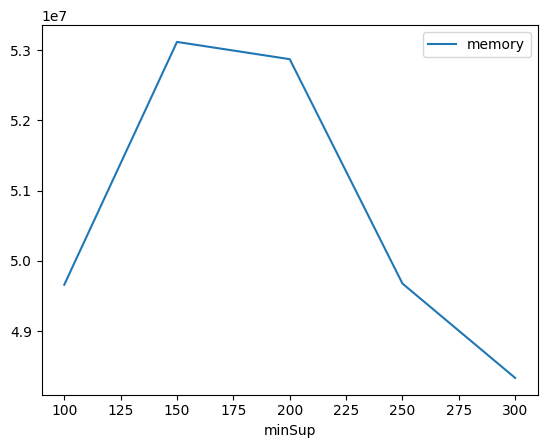

Graph for memory consumption is successfully generated!


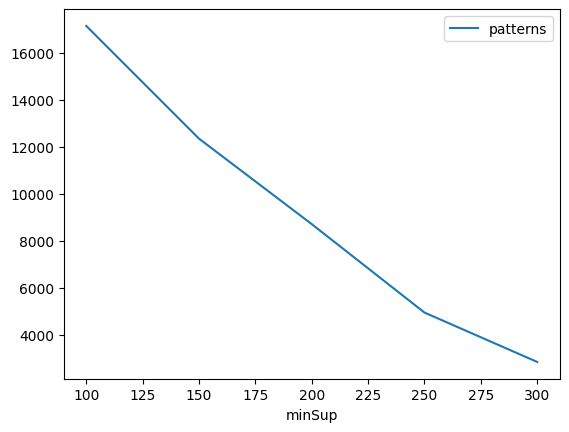

Graph for No Of Patterns is successfully generated!


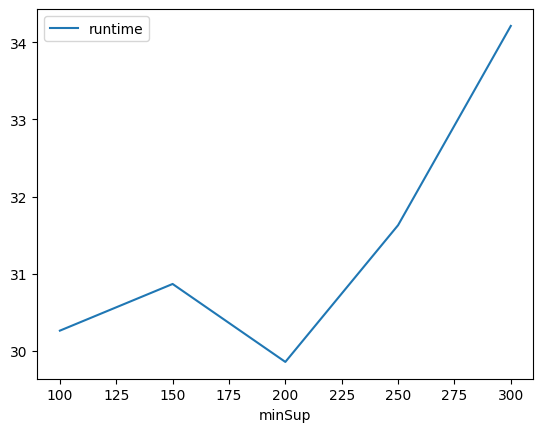

Graph for Runtime taken is successfully generated!


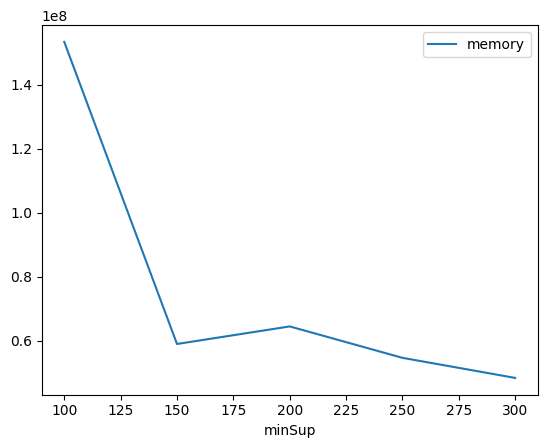

Graph for memory consumption is successfully generated!


In [33]:
ab = plt.plotGraphsFromDataFrame(result)
ab.plotGraphsFromDataFrame() #drawPlots()

### Step 6: Saving the results as latex files

In [34]:
from PAMI.extras.graph import generateLatexFileFromDataFrame as gdf
gdf.generateLatexCode(result)

Latex files generated successfully
Latex files generated successfully
